# Importando as bibliotecas

In [1]:
# Instalar Jupyter Notebook
#!pip install opencv-python numpy matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from rembg import remove


# Desenvolvendo e testando as funções usada para análise

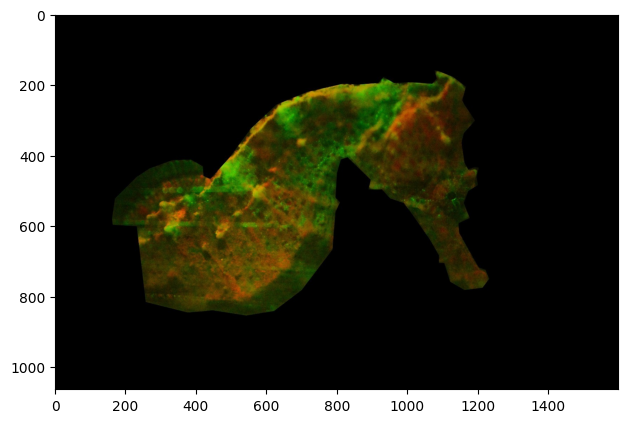

In [2]:
image_path = r"C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem4.jpg" # Lendo o caminho do arquivo
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(remove(cv2.imread(image_path)), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.imshow(image)
# plt.subplot(1,2,2)
# plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))


In [3]:
# Definindo os limites inferiores (mais escuros) e superiores (mais claros) de verde (110,172,3)
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

# Definindo os limites inferiores (mais escuros) e superiores (mais claros) de vermelho (limites de acordo com o arquivo)
lower_red = np.array([100,0,0])
upper_red = np.array([255,100,100])

# Definindo os limites inferiores (mais escuros) e superiores (mais claros) de vermelho (limites de acordo com o arquivo)
lower_red_excel = np.array([68,22,0])
upper_red_excel = np.array([255,106,28])

In [4]:
# Criando as máscaras que serão usadas para leitura das imagens
mask_black = cv2.inRange(image, np.array([0, 0, 0]), np.array([0, 0, 0]))
mask_green = cv2.inRange(image, lower_green, upper_green)
mask_red = cv2.inRange(image, lower_red, upper_red)
mask_red_excel = cv2.inRange(image, lower_red_excel, upper_red_excel)

$$ Percentual\;de\;verde = \frac{Pixels\;verdes}{Pixels\;totais\;-\;Pixels\;pretos} $$ 

<br>

$$ Percentual\;de\;vermelhos = \frac{Pixels\;vermelhos}{Pixels\;totais\;-\;Pixels\;pretos} $$ 

<br>

$$ Percentual\;de\;vermelhos(Excel) = \frac{Pixels\;vermelhos(Excel)}{Pixels\;totais\;-\;Pixels\;pretos} $$ 

In [5]:
# Calculando o total de pixels da imagem
total_pixels = image.shape[0] * image.shape[1]

# Calculando o total de pixels pretos da imagem
black_pixels = cv2.countNonZero(mask_black)

# Calculando o total de pixels verdes da imagem
green_pixels = cv2.countNonZero(mask_green)

# Calculando o total de pixels vermelhos da imagem
red_pixels = cv2.countNonZero(mask_red)

# Calculando o total de pixels vermelhos da imagem (Excel)
red_pixels_excel = cv2.countNonZero(mask_red_excel)

# Calculando o percentual de pixels pretos da imagem
black_percentage = (black_pixels / total_pixels ) * 100

# Calculando o percentual de pixels verdes da imagem
green_percentage = (green_pixels / (total_pixels - black_pixels)) * 100

# Calculando o percentual de pixels vermelhos da imagem
red_percentage = (red_pixels / (total_pixels - black_pixels)) * 100

# Calculando o percentual de pixels vermelhos da imagem (Excel)
red_percentage_excel = (red_pixels_excel / (total_pixels - black_pixels)) * 100

In [6]:
print(f"O percentual de pixels pretos na imagem é de {round(black_percentage, 2)}%")
print(f"O percentual de pixels verdes na imagem é de {round(green_percentage, 2)}%")
print(f"O percentual de pixels vermelhos na imagem é de {round(red_percentage, 2)}%")
print(f"O percentual de pixels vermelhos (Excel) na imagem é de {round(red_percentage_excel, 2)}%")

O percentual de pixels pretos na imagem é de 74.09%
O percentual de pixels verdes na imagem é de 5.8%
O percentual de pixels vermelhos na imagem é de 8.81%
O percentual de pixels vermelhos (Excel) na imagem é de 27.12%


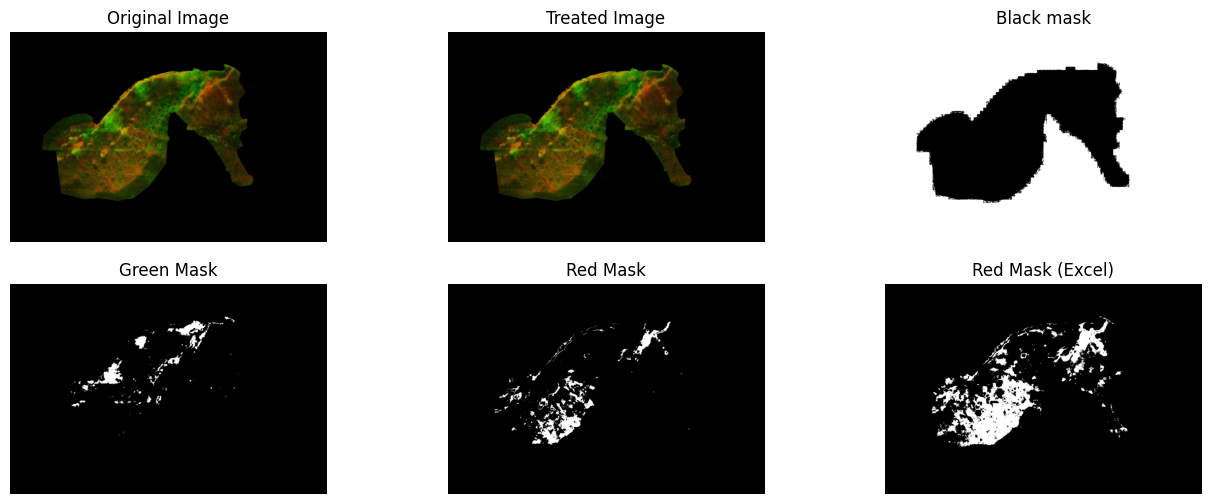

In [7]:
# Definindo o tamanho da plotagem das imagens
plt.figure(figsize=(16, 6));

# Plotando a imagem em si
plt.subplot(2, 3, 1);
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB));
plt.title('Original Image');
plt.axis('off');

# Plotando a imagem tratada
plt.subplot(2, 3, 2);
plt.imshow(image);
plt.title('Treated Image');
plt.axis('off');

# Plotando a máscara de preta
plt.subplot(2, 3, 3);
plt.imshow(mask_black, cmap='gray');
plt.title('Black mask');
plt.axis('off');

# Plotando a máscara de verde
plt.subplot(2, 3, 4);
plt.imshow(mask_green, cmap='gray');
plt.title('Green Mask');
plt.axis('off');

# Plotando a máscara de vermelho
plt.subplot(2, 3, 5);
plt.imshow(mask_red, cmap='gray');
plt.title('Red Mask');
plt.axis('off');

# Plotando a máscara de vermelho (Excel)
plt.subplot(2, 3, 6);
plt.imshow(mask_red_excel, cmap='gray');
plt.title('Red Mask (Excel)');
plt.axis('off');

# Definindo uma função que automatize o processo

In [8]:
def calculate_color_percentage(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    # image = cv2.cvtColor(remove(cv2.imread(image_path)), cv2.COLOR_BGR2RGB)

    if image is None:
        raise ValueError("Unable to read the image file. Please check the file path.")

    # Defini o range de verde em RGB
    lower_green = np.array([0, 100, 0])
    upper_green = np.array([100, 255, 100])

    # Defini o range de vermelho em RGB
    lower_red = np.array([100, 0, 0])
    upper_red = np.array([255, 100, 100])

    # Defini o range de vermelho em RGB (Excel)
    lower_red_excel = np.array([68,22,0])
    upper_red_excel = np.array([255,106,28])

    # Apliquei os filtros para criar máscaras das cores desejadas
    mask_black = cv2.inRange(image, np.array([0, 0, 0]), np.array([0, 0, 0]))
    mask_green = cv2.inRange(image, lower_green, upper_green)
    mask_red = cv2.inRange(image, lower_red, upper_red)
    mask_red_excel = cv2.inRange(image, lower_red_excel, upper_red_excel)

    # Calculei o percentual da imagem que contém cada uma das cores definidas
    total_pixels = image.shape[0] * image.shape[1]
    black_pixels = cv2.countNonZero(mask_black)
    green_pixels = cv2.countNonZero(mask_green)
    red_pixels = cv2.countNonZero(mask_red)
    red_pixels_excel = cv2.countNonZero(mask_red_excel)
    black_percentage = (black_pixels / total_pixels ) * 100
    green_percentage = (green_pixels / (total_pixels - black_pixels)) * 100
    red_percentage = (red_pixels / (total_pixels - black_pixels)) * 100
    red_percentage_excel = (red_pixels_excel / (total_pixels - black_pixels)) * 100

    plt.figure(figsize=(10, 5));

    plt.subplot(2, 3, 1);
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB));
    plt.title('Original Image');
    plt.axis('off');

    plt.subplot(2, 3, 2);
    plt.imshow(image);
    plt.title('Treated Image');
    plt.axis('off');

    plt.subplot(2, 3, 3);
    plt.imshow(mask_black, cmap='gray');
    plt.title('Black mask');
    plt.axis('off');

    plt.subplot(2, 3, 4);
    plt.imshow(mask_green, cmap='gray');
    plt.title('Green Mask');
    plt.axis('off');

    plt.subplot(2, 3, 5);
    plt.imshow(mask_red, cmap='gray');
    plt.title('Red Mask');
    plt.axis('off');

    plt.subplot(2, 3, 6);
    plt.imshow(mask_red_excel, cmap='gray');
    plt.title('Red Mask (Excel)');
    plt.axis('off');

    print(f"O percentual de pixels pretos na imagem é de {round(black_percentage, 2)}%")
    print(f"O percentual de pixels verdes na imagem é de {round(green_percentage, 2)}%")
    print(f"O percentual de pixels vermelhos na imagem é de {round(red_percentage, 2)}%")
    print(f"O percentual de pixels vermelhos (Excel) na imagem é de {round(red_percentage_excel, 2)}%")
    print("")

    # return green_percentage, red_percentage, red_percentage_excel

# Aplicando a função às imagens

## Imagem 1

O percentual de pixels pretos na imagem é de 0.0%
O percentual de pixels verdes na imagem é de 13.08%
O percentual de pixels vermelhos na imagem é de 0.43%
O percentual de pixels vermelhos (Excel) na imagem é de 1.6%



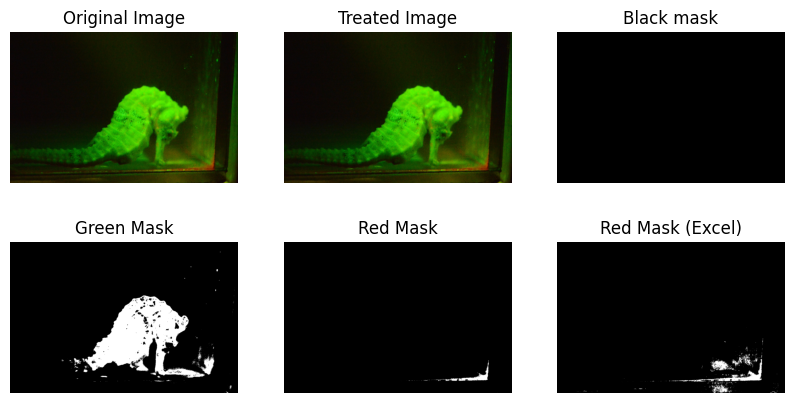

In [9]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem1_full.jpg')

## Imagem 2

O percentual de pixels pretos na imagem é de 0.0%
O percentual de pixels verdes na imagem é de 3.62%
O percentual de pixels vermelhos na imagem é de 2.8%
O percentual de pixels vermelhos (Excel) na imagem é de 8.37%



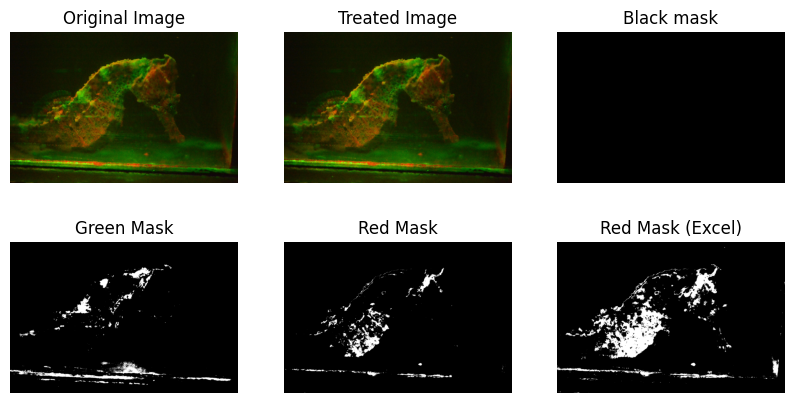

In [10]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem2_full.jpg')

## Imagem 3

O percentual de pixels pretos na imagem é de 0.0%
O percentual de pixels verdes na imagem é de 5.3%
O percentual de pixels vermelhos na imagem é de 0.22%
O percentual de pixels vermelhos (Excel) na imagem é de 5.53%



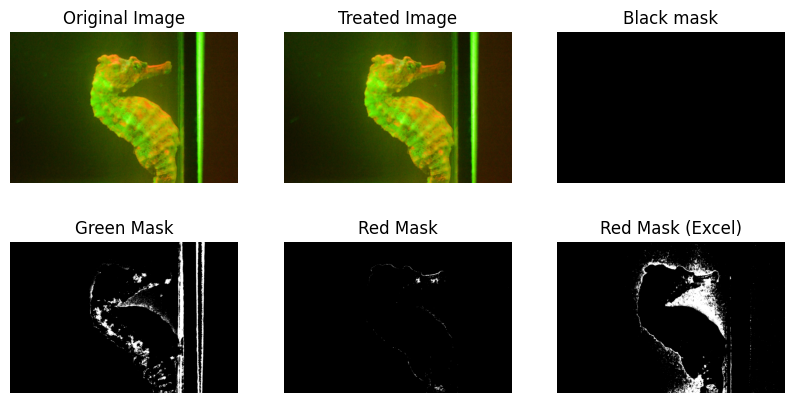

In [11]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem3_full.jpg')

## Imagem 4

O percentual de pixels pretos na imagem é de 74.09%
O percentual de pixels verdes na imagem é de 5.8%
O percentual de pixels vermelhos na imagem é de 8.81%
O percentual de pixels vermelhos (Excel) na imagem é de 27.12%



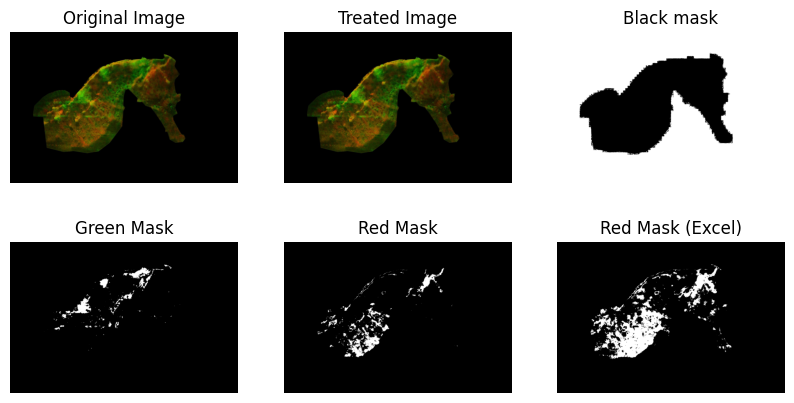

In [12]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem4.jpg')

## Imagem 5

O percentual de pixels pretos na imagem é de 73.63%
O percentual de pixels verdes na imagem é de 13.04%
O percentual de pixels vermelhos na imagem é de 1.01%
O percentual de pixels vermelhos (Excel) na imagem é de 3.81%



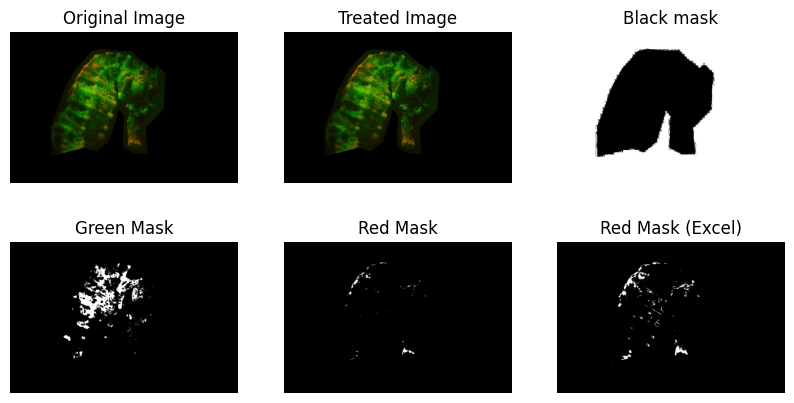

In [13]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem5.jpg')

## Imagem 6

O percentual de pixels pretos na imagem é de 68.37%
O percentual de pixels verdes na imagem é de 0.45%
O percentual de pixels vermelhos na imagem é de 8.91%
O percentual de pixels vermelhos (Excel) na imagem é de 22.31%



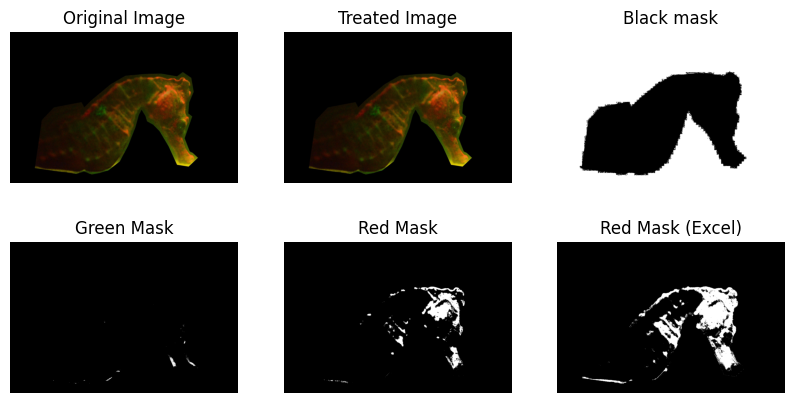

In [14]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem6.jpg')

## Imagem 7

O percentual de pixels pretos na imagem é de 72.63%
O percentual de pixels verdes na imagem é de 25.33%
O percentual de pixels vermelhos na imagem é de 8.34%
O percentual de pixels vermelhos (Excel) na imagem é de 28.23%



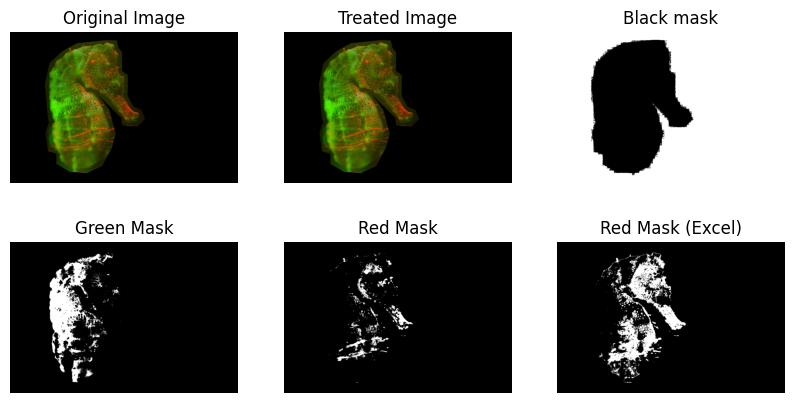

In [15]:
calculate_color_percentage(r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img\imagem7.jpg')

# Iterando sobre todas as fotos de uma pasta e aplicando a análise em cada imagem

In [16]:
import os

def process_images_in_folder(folder_path, calculate_color_percentage):
    results = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            print(filename)
            image_path = os.path.join(folder_path, filename)
            result = calculate_color_percentage(image_path)
            results.append((filename, result))
    return results

imagem1_full.jpg
O percentual de pixels pretos na imagem é de 0.0%
O percentual de pixels verdes na imagem é de 13.08%
O percentual de pixels vermelhos na imagem é de 0.43%
O percentual de pixels vermelhos (Excel) na imagem é de 1.6%

imagem2_full.jpg
O percentual de pixels pretos na imagem é de 0.0%
O percentual de pixels verdes na imagem é de 3.62%
O percentual de pixels vermelhos na imagem é de 2.8%
O percentual de pixels vermelhos (Excel) na imagem é de 8.37%

imagem3_full.jpg
O percentual de pixels pretos na imagem é de 0.0%
O percentual de pixels verdes na imagem é de 5.3%
O percentual de pixels vermelhos na imagem é de 0.22%
O percentual de pixels vermelhos (Excel) na imagem é de 5.53%

imagem4.jpg
O percentual de pixels pretos na imagem é de 74.09%
O percentual de pixels verdes na imagem é de 5.8%
O percentual de pixels vermelhos na imagem é de 8.81%
O percentual de pixels vermelhos (Excel) na imagem é de 27.12%

imagem5.jpg
O percentual de pixels pretos na imagem é de 73.63%
O

[('imagem1_full.jpg', None),
 ('imagem2_full.jpg', None),
 ('imagem3_full.jpg', None),
 ('imagem4.jpg', None),
 ('imagem5.jpg', None),
 ('imagem6.jpg', None),
 ('imagem7.jpg', None)]

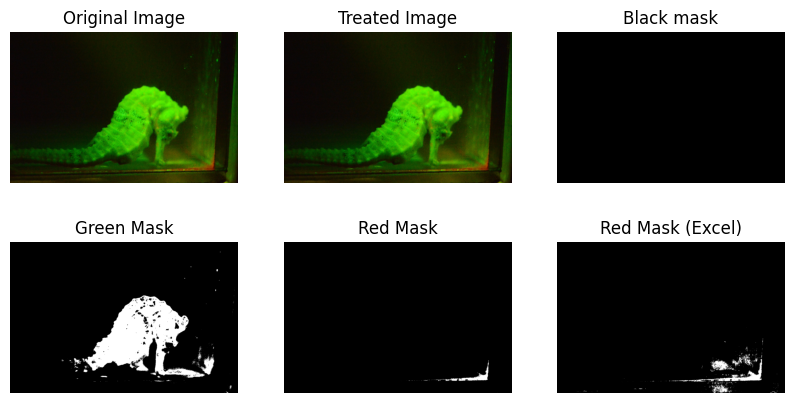

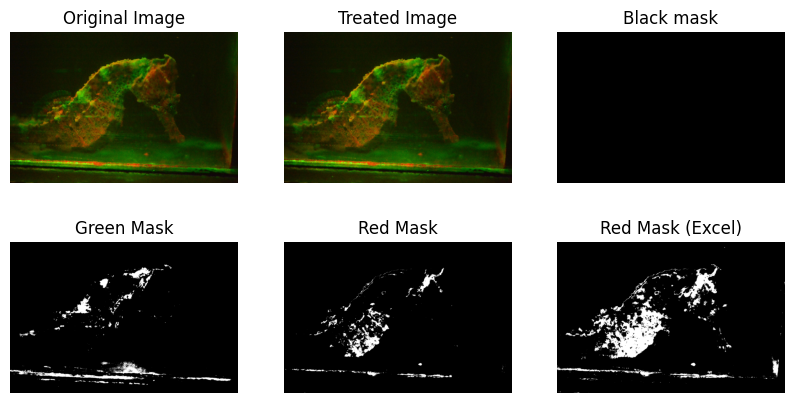

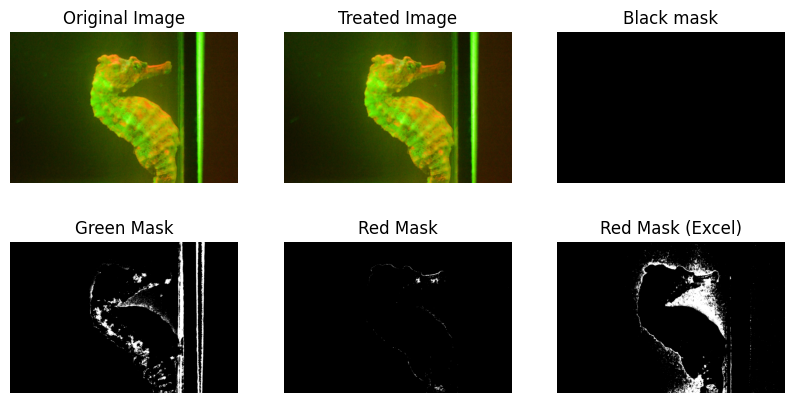

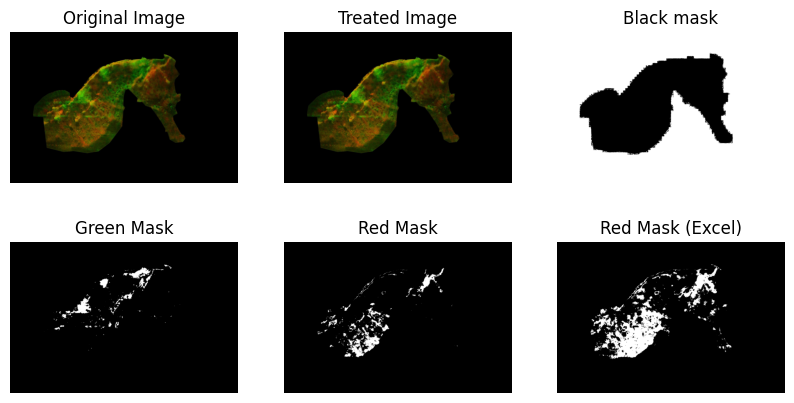

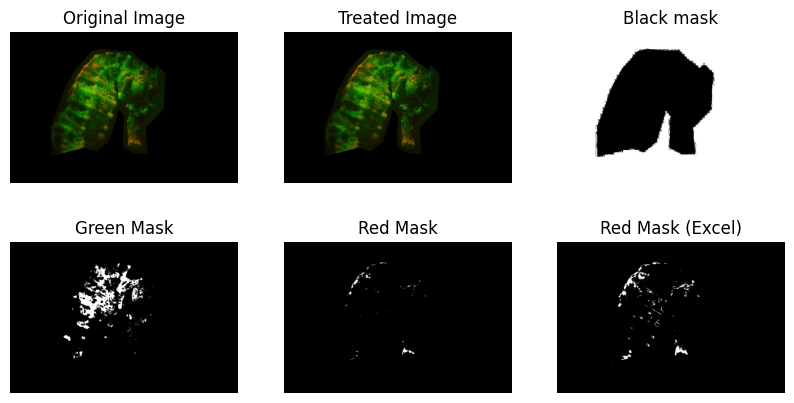

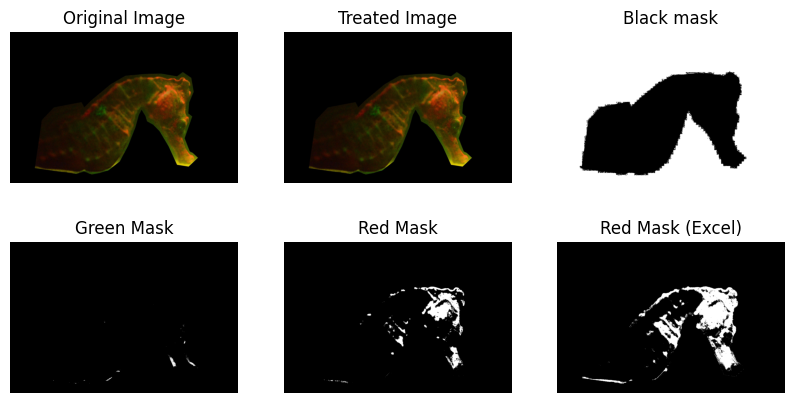

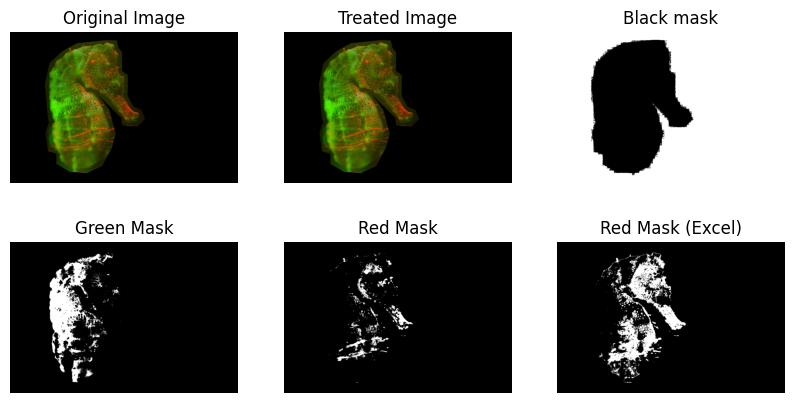

In [17]:
folder_path = r'C:\Users\piato\OneDrive\Documentos\repos\cavalos_marinhos\img'

process_images_in_folder(folder_path, calculate_color_percentage)